In [ ]:
pip install tensorflow

In [16]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import cv2
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras import regularizers
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras import models,layers
from tensorflow.keras.utils import to_categorical






In [5]:
# Path to the folder containing the numbered images
image_folder = r"D:\Lectures\Senior-2\Deep Learning\Project\images\images"

# Path to the CSV file
csv_file_path = r"C:\Users\sheha\OneDrive\Desktop\train.csv"

# Read the CSV file
df = pd.read_csv(csv_file_path)

# Function to load and parse images
def load_images_and_labels(image_folder, df, target_size=(1620, 1050)):
    data = []
    labels = []

    for index, row in df.iterrows():
        image_id = row['id']
        species = row['species']

        # Construct the image file path based on the ID
        image_path = os.path.join(image_folder, f"{image_id}.jpg")

        # Load the image using OpenCV in grayscale mode
        #image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


        # Resize the image to the target size with replicated padding
        height, width = image.shape
        new_height, new_width = target_size

        # Calculate padding
        pad_height = max(0, (new_height - height) // 2)
        pad_width = max(0, (new_width - width) // 2)

        # Replicate padding
        image = cv2.copyMakeBorder(image, pad_height, pad_height, pad_width, pad_width, cv2.BORDER_REPLICATE)

        # Resize the image to the target size
        image = cv2.resize(image, (new_width, new_height))

        # Convert OpenCV image to TensorFlow tensor
        numpy_array = np.array(image)

         # Append the image and label to the lists
        data.append(numpy_array)
        labels.append(species)

    return data,labels

# Load images and labels
images,labels = load_images_and_labels(image_folder, df, target_size=(1620, 1050))



In [6]:
updated_labels = np.array(labels)
updated_images= np.array(images)

In [7]:
print(updated_images.shape)
print(updated_labels.shape)

(990, 1620, 1050)
(990,)


In [8]:
updated_images= updated_images.reshape(len(updated_images),1620,1050,1)
updated_labels= updated_labels.reshape(len(updated_labels),1)

In [9]:
print(updated_images.shape)
print(updated_labels.shape)

(990, 1620, 1050, 1)
(990, 1)


In [10]:
LabelEncoder  = preprocessing.LabelEncoder()
LabelEncoder.fit(updated_labels)
num_labels = LabelEncoder.transform(updated_labels)



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [ ]:
# Create a DataFrame
df_result = pd.DataFrame({'images': updated_images, 'labels': num_labels})

# Save the DataFrame to a CSV file
output_csv_path = r"E:\Semester 9\Deep Learning\Project\dataset.csv"
df_result.to_csv(output_csv_path, index=False)

In [52]:
network = models.Sequential()

# First Convolutional layer with (3,3) matrix size, same padding refers to add additional columns or rows to align
# with the filter and a maxpooling layers which takes maximum value in the (3,3) pixel value matrix.
network.add(layers.Conv2D(10,(3,3), padding='valid', activation='relu', input_shape = (1620,1050,1)))
network.add(layers.MaxPool2D((3,3)))

# Second convolutional layer same as above but this one produces 16 feature maps unlike 10 above.
network.add(layers.Conv2D(16,(3,3), padding='valid', activation='relu'))
network.add(layers.MaxPool2D((3,3)))


# Third convolutional layer same as above but this one produces 128 feature maps unlike 256 above.
network.add(layers.Conv2D(16,(3,3), padding='valid', activation='relu'))
network.add(layers.MaxPool2D((3,3)))

# Flatten layer
network.add(layers.Flatten())



# Dense layer of 64 neurons with L2 regularization and ReLU activation function
network.add(layers.Dense(64, kernel_regularizer = regularizers.l2(0.01), activation='relu'))

# Dropout layer of 20%
network.add(layers.Dropout(0.2))

# Dense Layer of 64 neurons with L2 regularization and ReLU activation function
network.add(layers.Dense(64, kernel_regularizer = regularizers.l2(0.01), activation='relu'))

# Final Dense Layer with number of neurons same as number of classes of classification and 'softmax' as the
# activation function
# softmax is useful because it converts the output layer into what is essentially a probability distribution.
network.add(layers.Dense(99, activation='softmax'))

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(updated_images, num_labels, test_size=0.2, random_state=5, shuffle=True)


In [54]:
Y_train_one_hot = to_categorical(Y_train, num_classes = 99)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 1618, 1048, 10)    100       
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 539, 349, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 537, 347, 16)      1456      
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 179, 115, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 177, 113, 16)      2320      
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 59, 37, 16)       

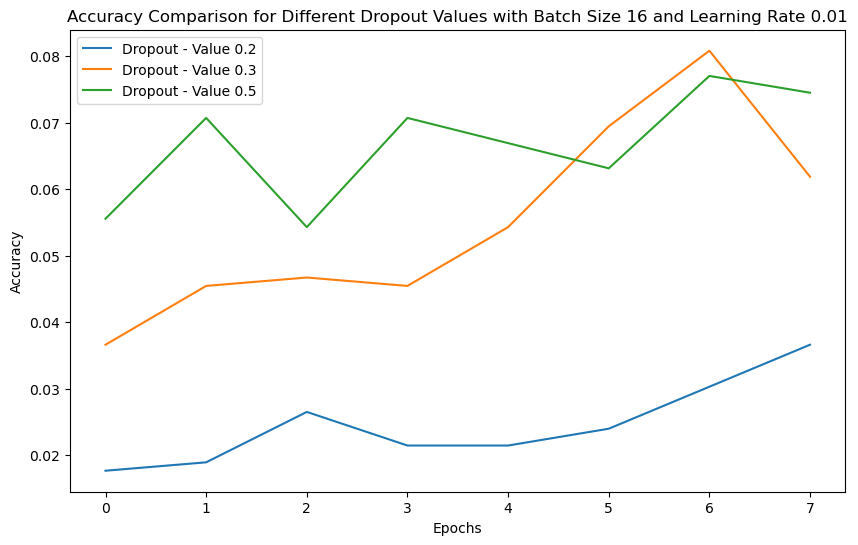

In [56]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import CategoricalCrossentropy

# List of dropout values to try
dropout_values = [0.2, 0.3, 0.5]

# Dictionary to store accuracy results for each dropout value
accuracy_results_dropout = {}


# Iterate through each dropout value
for i, dropout_value in enumerate(dropout_values):
    # Compile the network with the current dropout value
    network.compile(optimizer=SGD(learning_rate=0.01), loss=CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

    # Add dropout layers to the network
    network.add(tf.keras.layers.Dropout(dropout_value))

    # Print network summary to check the layer shapes
    print(network.summary())

    # Train the network (assuming X_train and Y_train_one_hot are defined)
    history = network.fit(X_train, Y_train_one_hot, epochs=8, batch_size=16, verbose=1)

    # Store the accuracy results for the current dropout value
    accuracy_results_dropout[dropout_value] = history.history['accuracy']

    # Remove dropout layers for the next iteration
    network.pop()

# Plot the accuracy results for each dropout value
plt.figure(figsize=(10, 6))
for dropout_value, accuracy_values in accuracy_results_dropout.items():
    plt.plot(accuracy_values, label=f'Dropout - Value {dropout_value}')

plt.title('Accuracy Comparison for Different Dropout Values with Batch Size 16 and Learning Rate 0.01')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
